In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

plt.style.use("ggplot")
FILENAME_HEADER = "filename"
INIT_ENERGY_HEADER = "Initial Mean Energy (MeV)"
path = "/home/jncfa/idp_exercices/final_project/BraggPeak/build/output/"
filedata = [{FILENAME_HEADER: path+f"BraggPeak_{energy}mev.out", INIT_ENERGY_HEADER: energy} for energy in range(50, 160, 10)]
#filedata = [{FILENAME_HEADER: path+f"BraggPeak_10mev.out", INIT_ENERGY_HEADER: 10},]

ENERGYDEP_PARTICLE = "Energy Loss (MeV)"

STOPPINGPOWER_PARTICLE_STD = "dE/dx (MeV/cm) std"
STOPPINGPOWER_PARTICLE_MEAN = "dE/dx (MeV/cm)"

STEP_PARTICLE = "Step Length (cm)"
DIST_PARTICLE = "Range (cm)"
DISTBIN_PARTICLE = "Range (cm)[bin]"

data = pd.DataFrame(columns=[DIST_PARTICLE, STOPPINGPOWER_PARTICLE_MEAN, STOPPINGPOWER_PARTICLE_STD, INIT_ENERGY_HEADER])

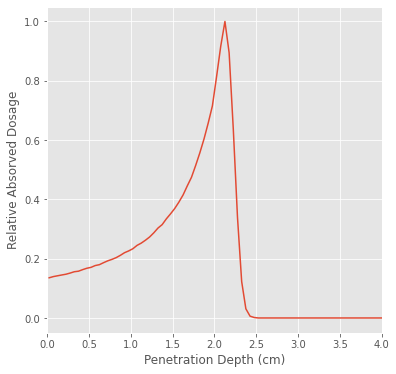

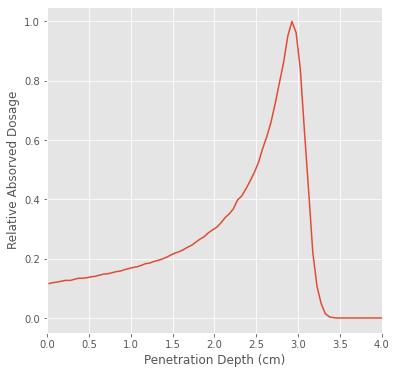

In [17]:

coeffs_list = {}

for currentFile in filedata:
    df = pd.read_table(currentFile[FILENAME_HEADER], names=[DIST_PARTICLE,ENERGYDEP_PARTICLE,STEP_PARTICLE,]) 
    df[STOPPINGPOWER_PARTICLE_MEAN] = df[ENERGYDEP_PARTICLE]/df[STEP_PARTICLE]
    df.sort_values([DIST_PARTICLE], inplace=True)
   
    # do histogram of range over stopping power
    bin_list = np.arange(0, 20, 0.05)
    hist, bin_edges = np.histogram(df[DIST_PARTICLE], bins=np.append(bin_list, 20), weights=df[STOPPINGPOWER_PARTICLE_MEAN])
    hist /= np.max(hist)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    average_dosage_range = np.sum(hist*bin_centres) / np.sum(hist)
    peak_dist = bin_centres[np.argmax(hist)]
    
    # Define model function to be used to fit to the data above:
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    #p0 = [1., peak_dist, peak_dist*0.01]
    #coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds = (0, np.inf))

    #print(coeff, np.sqrt(np.diag(var_matrix)))
    #print(currentFile[INIT_ENERGY_HEADER], f"{coeff[1]:.4f} \pm {np.sqrt(np.diag(var_matrix))[1]:.6f} cm")
    #print(currentFile[INIT_ENERGY_HEADER], f"{2*np.sqrt(2*np.log(2))*coeff[2]:.4f} \pm {2*np.sqrt(2*np.log(2))*np.sqrt(np.diag(var_matrix))[2]:.6f} cm")
    # Get the fitted curve
    #hist_fit = gauss(bin_centres, *coeff)
    #

    fig = plt.figure(figsize=[6,6])
    axis = fig.add_subplot()

    axis.plot(bin_centres, hist, label='Simulated data')
    #axis.set_yscale("log")
    #axis.plot(bin_centres, hist_fit, "--", label='Fitted data')
    axis.set_ylabel('Relative Absorved Dosage')
    axis.set_xlabel('Penetration Depth (cm)')
    coeffs_list[currentFile[INIT_ENERGY_HEADER]] = (average_dosage_range, peak_dist)
    axis.set_xlim([0, min(int(peak_dist)+2*np.ceil(peak_dist/3), 20)])
    #plt.setp(axis.legend().get_texts(), color='k') # sets legend text to black, for some reason the text is showing up white??
    fig.savefig(f"relatorio/images/bragg_peak_{currentFile[INIT_ENERGY_HEADER]}mev.pdf", facecolor='none')
    


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

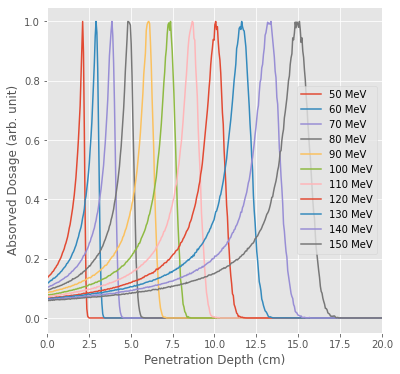

In [14]:
fig = plt.figure(figsize=[6,6])
axis = fig.add_subplot()
axis.set_ylabel('Absorved Dosage (arb. unit)')
axis.set_xlabel('Penetration Depth (cm)')
coeffs_list[currentFile[INIT_ENERGY_HEADER]] = (average_dosage_range, peak_dist)
axis.set_xlim([0, 20])
for currentFile in filedata:
    df = pd.read_table(currentFile[FILENAME_HEADER], names=[DIST_PARTICLE,ENERGYDEP_PARTICLE,STEP_PARTICLE,]) 
    df[STOPPINGPOWER_PARTICLE_MEAN] = df[ENERGYDEP_PARTICLE]/df[STEP_PARTICLE]
    df.sort_values([DIST_PARTICLE], inplace=True)
   
    # do histogram of range over stopping power
    bin_list = np.arange(0, 20, 0.05)
    hist, bin_edges = np.histogram(df[DIST_PARTICLE], bins=np.append(bin_list, 20), weights=df[STOPPINGPOWER_PARTICLE_MEAN])
    hist /= np.max(hist)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    average_dosage_range = np.sum(hist*bin_centres) / np.sum(hist)
    peak_dist = bin_centres[np.argmax(hist)]
    
    # Define model function to be used to fit to the data above:
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    #p0 = [1., peak_dist, peak_dist*0.01]
    #coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds = (0, np.inf))

    #print(coeff, np.sqrt(np.diag(var_matrix)))
    #print(currentFile[INIT_ENERGY_HEADER], f"{coeff[1]:.4f} \pm {np.sqrt(np.diag(var_matrix))[1]:.6f} cm")
    #print(currentFile[INIT_ENERGY_HEADER], f"{2*np.sqrt(2*np.log(2))*coeff[2]:.4f} \pm {2*np.sqrt(2*np.log(2))*np.sqrt(np.diag(var_matrix))[2]:.6f} cm")
    # Get the fitted curve
    #hist_fit = gauss(bin_centres, *coeff)
    #

    axis.plot(bin_centres, hist, label=f'{currentFile[INIT_ENERGY_HEADER]} MeV')
    #axis.set_yscale("log")
    #axis.plot(bin_centres, hist_fit, "--", label='Fitted data')
#fig.savefig(f"relatorio/images/bragg_peak_{currentFile[INIT_ENERGY_HEADER]}mev.pdf", facecolor='none')
plt.setp(axis.legend().get_texts(), color='k') # sets legend text to black, for some reason the text is showing up white??



{50: (1.531314685412991, 2.125), 60: (2.1633642287649093, 2.9250000000000003), 70: (2.903069250077787, 3.875), 80: (3.732114237389524, 4.825000000000001), 90: (4.652447171807507, 6.075000000000001), 100: (5.672425780718693, 7.375), 110: (6.765176516033061, 8.675), 120: (7.936617930668806, 10.075000000000001), 130: (9.191089271664586, 11.625), 140: (10.530769828714854, 13.375), 150: (11.931450008022038, 15.075000000000001)}
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150] [2.125, 2.9250000000000003, 3.875, 4.825000000000001, 6.075000000000001, 7.375, 8.675, 10.075000000000001, 11.625, 13.375, 15.075000000000001]
97.11538461538461 1.3271341516763264


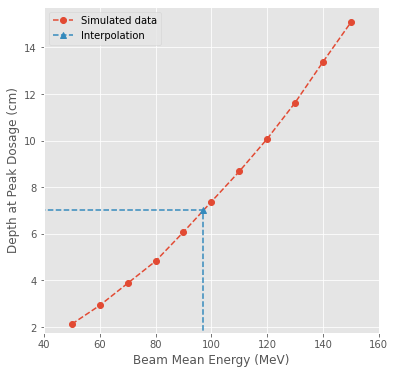

In [13]:
print(coeffs_list)

init_energies = [x for x in coeffs_list.keys()]
mean_dist = [coeffs_list[x][1] for x in init_energies]
print(init_energies, mean_dist)

fig = plt.figure(figsize=[6,6])
axis = fig.add_subplot()

axis.plot(init_energies, mean_dist, "o--", label='Simulated data')
axis.plot([30, ((init_energies[5] - init_energies[4])/(mean_dist[5] - mean_dist[4]))*(7-mean_dist[4]) + init_energies[4], ((init_energies[5] - init_energies[4])/(mean_dist[5] - mean_dist[4]))*(7-mean_dist[4]) + init_energies[4]], [7, 7, 1], "^--", label='Interpolation')
#plt.plot(bin_centres, hist_fit, "--", label='Fitted data')
#axis.plot(init_energies, mean_dist, label='Test data')
axis.set_ylabel('Depth at Peak Dosage (cm)')
axis.set_xlabel('Beam Mean Energy (MeV)')
axis.set_ylim([1.75, 15.75])
axis.set_xlim([40, 160])
plt.setp(axis.legend().get_texts(), color='k')
fig.savefig(f"relatorio/images/bragg_peak_interp.pdf", facecolor='none')

mean = (((init_energies[5] - init_energies[4])/(mean_dist[5] - mean_dist[4]))*(7-mean_dist[4]) + init_energies[4])
error = np.sqrt((0.05*(init_energies[5]- init_energies[4])/((mean_dist[5]- mean_dist[4])**2)*(7-mean_dist[4]))**2 + (0.05*(init_energies[5]- init_energies[4])/(mean_dist[5]- mean_dist[4])*(7/(mean_dist[5]- mean_dist[4])-1)))
print(mean, error)
#axis.set_xlim([None, Non])
#plt.setp(plt.legend().get_texts(), color='k') # for some reason the text is showing up white??2
#fig.savefig(f"relatorio/images/bragg_peak_{currentFile[INIT_ENERGY_HEADER]}mev.pdf", facecolor='none')